# Analysis of 2019 Horseshoe Lake SfM survey data

These initial results were obtained using the Scott et al. (2018) parameters:

Window width = 50 m
Stride = 25 m
Maximum Displacement = 5 m

Scott et al. (2018): The M7 2016 Kumamoto, Japan, Earthquake: 3-D Deformation Along the Fault and Within the Damage Zone Constrained From Differential Lidar Topography

Load data:

In [1]:
import numpy as np
import pickle as p

filename = 'results/HSL2019/HSLSurveyComparison_window50_stride25.p'

(x,y,ux,uy,uz) = p.load(open(filename,'rb'))

Filter all displacements > 5 m (maximum displacement) from ux, uy, uz:

In [2]:
ux[np.where(np.abs(ux) > 5.0)] = np.nan
uy[np.where(np.abs(uy) > 5.0)] = np.nan
uz[np.where(np.abs(uz) > 5.0)] = np.nan

Plot map-view distribution of ux, uy, uz:

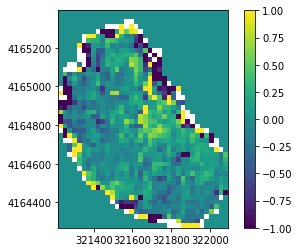

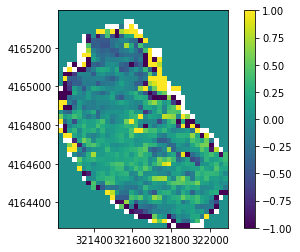

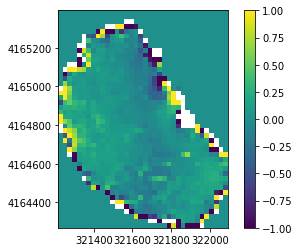

In [3]:
import matplotlib.pylab as plt

plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

The boundary effects here are clear, and so some masking will be necessary to meaningfully analyze the statistics.  Areas with no points were labeled with 0.0 in the original displacement grids.  We can erode the inverse of this by two pixels to eliminate boundary effects.  (As an aside, this may be a sensible protocol for real data processing as well).

Create mask:

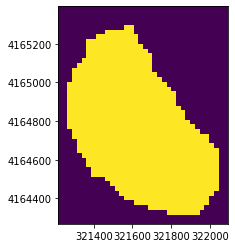

In [4]:
mask = np.logical_and((ux != 0), (uy != 0), (uz != 0))

from scipy.ndimage.morphology import binary_erosion

mask = binary_erosion(mask, iterations = 2)

plt.figure()
plt.imshow(mask,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)))

Mask displacements and plot:

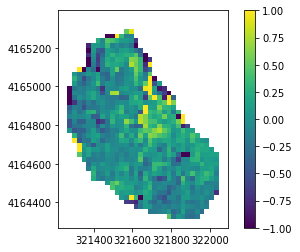

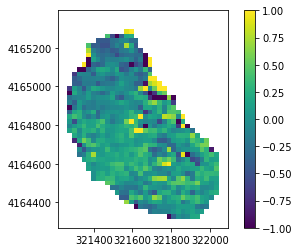

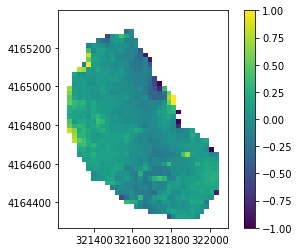

In [5]:
ux[np.where(mask != 1)] = np.nan
uy[np.where(mask != 1)] = np.nan
uz[np.where(mask != 1)] = np.nan

plt.figure()
plt.imshow(ux,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uy,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

plt.figure()
plt.imshow(uz,origin='upper',extent=(np.min(x),np.max(x),np.min(y),np.max(y)),vmin=-1.0,vmax=1.0)
plt.colorbar()

Plot histograms, compute statistics:

Statistics:
-----------

Mean / Std of horizontal displacement:  0.44366831401351703 0.573943853689764
Mean / Std of log10 horizontal displacement:  -0.5345212892341833 0.38029858395760757
Mean / Std of vertical displacement:  0.0351614866975238 0.25746985057350513


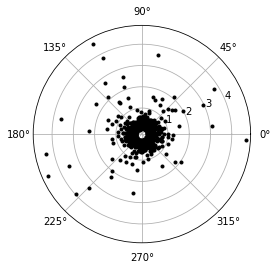

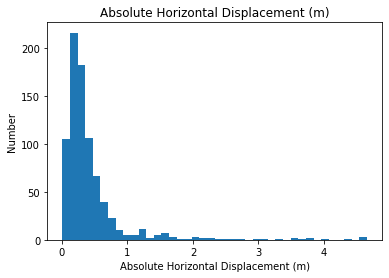

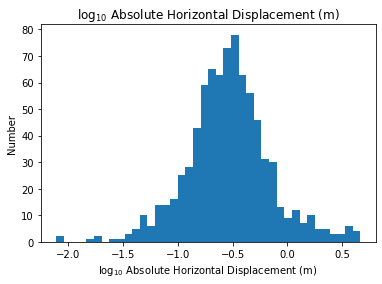

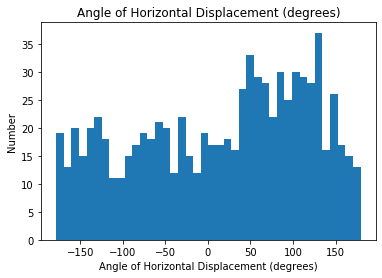

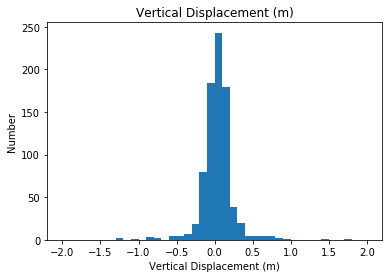

In [6]:
i = np.where(np.logical_and(~np.isnan(ux),~np.isnan(uy),~np.isnan(uz)))
theta = np.rad2deg(np.arctan2(uy[i],ux[i]))
r = np.sqrt(np.power(ux[i],2) + np.power(uy[i],2))
i = np.where(r <= 5.0)
theta = theta[i]
r = r[i]

plt.figure()
plt.polar(theta, r, 'k.')

plt.figure()
plt.hist(r,bins=40)
plt.title('Absolute Horizontal Displacement (m)')
plt.xlabel('Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(np.log10(r),bins=40)
plt.title('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.xlabel('$\log_{10}$ Absolute Horizontal Displacement (m)')
plt.ylabel('Number')

plt.figure()
plt.hist(theta,bins=40)
plt.title('Angle of Horizontal Displacement (degrees)')
plt.xlabel('Angle of Horizontal Displacement (degrees)')
plt.ylabel('Number')

plt.figure()
plt.hist(uz[~np.isnan(uz)],bins=40,range = (-2,2))
plt.title('Vertical Displacement (m)')
plt.xlabel('Vertical Displacement (m)')
plt.ylabel('Number')

print('Statistics:')
print('-----------')
print('')
print('Mean / Std of horizontal displacement: ', np.mean(r), np.std(r))
print('Mean / Std of log10 horizontal displacement: ', np.mean(np.log10(r)), np.std(np.log10(r)))
print('Mean / Std of vertical displacement: ', np.nanmean(uz), np.nanstd(uz))
